# Foundations for Analytics with Python (ch2)

## CSV 파일 열기 (pandas)

In [1]:
import pandas as pd
data_frame = pd.read_csv('supplier_data.csv')
print(data_frame)
data_frame.to_csv('pandas_output.csv', index=False)

   Supplier Name Invoice Number  Part Number      Cost Purchase Date
0     Supplier X       001-1001         2341  $500.00      1/20/2014
1     Supplier X       001-1001         2341  $500.00      1/20/2014
2     Supplier X       001-1001         5467  $750.00      1/20/2014
3     Supplier X       001-1001         5467  $750.00      1/20/2014
4     Supplier Y        50-9501         7009  $250.00      1/30/2014
5     Supplier Y        50-9501         7009  $250.00      1/30/2014
6     Supplier Y        50-9505         6650  $125.00       2/3/2014
7     Supplier Y        50-9505         6650  $125.00       2/3/2014
8     Supplier Z       920-4803         3321  $615.00       2/3/2014
9     Supplier Z       920-4804         3321  $615.00      2/10/2014
10    Supplier Z       920-4805         3321  $615.00      2/17/2014
11    Supplier Z       920-4806         3321  $615.00      2/24/2014


## CSV 파일 필터링하기 (pandas) - 조건 제시 (.contains)

In [2]:
data_frame = pd.read_csv('supplier_data.csv')

data_frame['Cost'] = data_frame['Cost'].str.strip('$').astype(float)
data_frame_value_meets_condition = data_frame.loc \
[(data_frame['Supplier Name'].str.contains('Z')) | (data_frame['Cost']> 600.0), :]
print(data_frame_value_meets_condition)

   Supplier Name Invoice Number  Part Number   Cost Purchase Date
2     Supplier X       001-1001         5467  750.0     1/20/2014
3     Supplier X       001-1001         5467  750.0     1/20/2014
8     Supplier Z       920-4803         3321  615.0      2/3/2014
9     Supplier Z       920-4804         3321  615.0     2/10/2014
10    Supplier Z       920-4805         3321  615.0     2/17/2014
11    Supplier Z       920-4806         3321  615.0     2/24/2014


## CSV 파일 필터링하기 (pandas) - 리스트 포함 여부 (.isin)

In [2]:
data_frame = pd.read_csv('supplier_data.csv')

important_dates = ['1/20/2014', '1/30/2014']
data_frame_value_in_set = data_frame.loc \
[data_frame['Purchase Date'].isin(important_dates), :]

print(data_frame_value_in_set)

  Supplier Name Invoice Number  Part Number      Cost Purchase Date
0    Supplier X       001-1001         2341  $500.00      1/20/2014
1    Supplier X       001-1001         2341  $500.00      1/20/2014
2    Supplier X       001-1001         5467  $750.00      1/20/2014
3    Supplier X       001-1001         5467  $750.00      1/20/2014
4    Supplier Y        50-9501         7009  $250.00      1/30/2014
5    Supplier Y        50-9501         7009  $250.00      1/30/2014


## CSV 파일 필터링하기 (pandas) - 패턴 활용(.startswith)

In [4]:
data_frame = pd.read_csv('supplier_data.csv')

data_frame_value_matches_pattern = data_frame.loc \
[data_frame['Invoice Number'].str.startswith('001-'), :]

print(data_frame_value_matches_pattern)

  Supplier Name Invoice Number  Part Number      Cost Purchase Date
0    Supplier X       001-1001         2341  $500.00      1/20/2014
1    Supplier X       001-1001         2341  $500.00      1/20/2014
2    Supplier X       001-1001         5467  $750.00      1/20/2014
3    Supplier X       001-1001         5467  $750.00      1/20/2014


## 특정 열 선택하기 (pandas) - 인덱스 값 사용(.iloc), 헤더 사용(.loc)

In [5]:
data_frame = pd.read_csv('supplier_data.csv')

data_frame_cloumn_by_index = data_frame.iloc[:, [0, 3]] # index = 0 or index = 3

print(data_frame_cloumn_by_index)

print('-'*20)

data_frame_column_by_name = data_frame.loc[:, ['Invoice Number', 'Purchase Date']]

print(data_frame_column_by_name)

   Supplier Name      Cost
0     Supplier X  $500.00 
1     Supplier X  $500.00 
2     Supplier X  $750.00 
3     Supplier X  $750.00 
4     Supplier Y  $250.00 
5     Supplier Y  $250.00 
6     Supplier Y  $125.00 
7     Supplier Y  $125.00 
8     Supplier Z  $615.00 
9     Supplier Z  $615.00 
10    Supplier Z  $615.00 
11    Supplier Z  $615.00 
--------------------
   Invoice Number Purchase Date
0        001-1001     1/20/2014
1        001-1001     1/20/2014
2        001-1001     1/20/2014
3        001-1001     1/20/2014
4         50-9501     1/30/2014
5         50-9501     1/30/2014
6         50-9505      2/3/2014
7         50-9505      2/3/2014
8        920-4803      2/3/2014
9        920-4804     2/10/2014
10       920-4805     2/17/2014
11       920-4806     2/24/2014


## 파일에서 데이터 값의 합계 및 평균 계산하기 (pandas), 그래프로 표현하기 (matplotlib)

  Supplier Name Invoice Number  Part Number      Cost Purchase Date
0    Supplier X       001-1001         2341  $500.00      1/20/2014
1    Supplier X       001-1001         2341  $500.00      1/20/2014
2    Supplier X       001-1001         5467  $750.00      1/20/2014
3    Supplier X       001-1001         5467  $750.00      1/20/2014
4    Supplier Y        50-9501         7009  $250.00      1/30/2014
total sales:  5710.0
average sales:  475.83


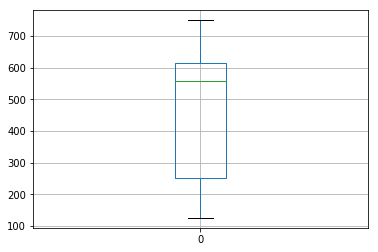

In [23]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

data_frame = pd.read_csv('supplier_data.csv')

print(data_frame.head())

cost_list = pd.DataFrame([float(str(value).strip('$').replace(',','')) for value in data_frame.loc[:, 'Cost']])

total_sales = cost_list.sum()
average_sales = cost_list.mean()

print('total sales: ', round(float(total_sales), 2))
print('average sales: ', round(float(average_sales), 2))

cost_list.boxplot()

plt.show()




## 여러 개의 CSV 파일 합치기 (pandas)

In [7]:
import pandas as pd

all_files = ['supplier_data.csv', 'pandas_output.csv']
all_data_frames = []
for file in all_files:
    data_frame = pd.read_csv(file, index_col=None)
    all_data_frames.append(data_frame)
data_frame_concat = pd.concat(all_data_frames, axis=0, ignore_index=True)
print(data_frame_concat)

   Supplier Name Invoice Number  Part Number      Cost Purchase Date
0     Supplier X       001-1001         2341  $500.00      1/20/2014
1     Supplier X       001-1001         2341  $500.00      1/20/2014
2     Supplier X       001-1001         5467  $750.00      1/20/2014
3     Supplier X       001-1001         5467  $750.00      1/20/2014
4     Supplier Y        50-9501         7009  $250.00      1/30/2014
5     Supplier Y        50-9501         7009  $250.00      1/30/2014
6     Supplier Y        50-9505         6650  $125.00       2/3/2014
7     Supplier Y        50-9505         6650  $125.00       2/3/2014
8     Supplier Z       920-4803         3321  $615.00       2/3/2014
9     Supplier Z       920-4804         3321  $615.00      2/10/2014
10    Supplier Z       920-4805         3321  $615.00      2/17/2014
11    Supplier Z       920-4806         3321  $615.00      2/24/2014
12    Supplier X       001-1001         2341  $500.00      1/20/2014
13    Supplier X       001-1001   

Thank You
jj2015@korea.ac.kr